# Project Overview
The objective of the sleep quality project is to provide recommendations for improving sleep quality through the analysis of visualizations and the identification of patterns using exploratory data analysis techniques.

# Import and Reading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sleep = pd.read_csv("sleep_health_data.csv")

# Exploratory Data Analysis (EDA)

In [3]:
sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


## Data Manipulation

In [5]:
# Replace the NaN value with "None"
sleep["Sleep Disorder"].fillna("None", inplace=True)

print("Sleep disorder contains:", sleep["Sleep Disorder"].unique())

Sleep disorder contains: ['None' 'Sleep Apnea' 'Insomnia']


In [6]:
print("BMI category contains:", sleep["BMI Category"].unique())

BMI category contains: ['Overweight' 'Normal' 'Obese' 'Normal Weight']


In [7]:
# Divide the BMI categories into two groups
bmi_groups = ["Normal", "Overweight"]

conditions = [
    sleep["BMI Category"].str.contains("Normal|Normal Weight"),
    sleep["BMI Category"].str.contains("Overweight|Obese")
]

sleep["BMI Category"] = np.select(conditions, bmi_groups)

print("BMI category contains:", sleep["BMI Category"].unique())

BMI category contains: ['Overweight' 'Normal']


In [8]:
# Separate the blood pressure values into systolic (upper) and diastolic (lower)
sleep[["Upper", "Lower"]] = sleep["Blood Pressure"].str.split("/", expand=True)
sleep[["Upper", "Lower"]] = sleep[["Upper", "Lower"]].apply(pd.to_numeric)

In [9]:
# Define blood pressure categories
labels = ["Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2"]

upper_bins = [0, 120, 139, 159, float("inf")]
lower_bins = [0, 80, 89, 99, float("inf")]

sleep["Upper Category"] = pd.cut(sleep["Upper"], labels=labels, bins=upper_bins)
sleep["Lower Category"] = pd.cut(sleep["Lower"], labels=labels, bins=lower_bins)

In [10]:
sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Upper,Lower,Upper Category,Lower Category
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83,Elevated,Elevated
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,Elevated,Normal
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,Elevated,Normal
3,4,Male,28,Sales Representative,5.9,4,30,8,Overweight,140/90,85,3000,Sleep Apnea,140,90,Hypertension Stage 1,Hypertension Stage 1
4,5,Male,28,Sales Representative,5.9,4,30,8,Overweight,140/90,85,3000,Sleep Apnea,140,90,Hypertension Stage 1,Hypertension Stage 1


## Correlation and Visualization

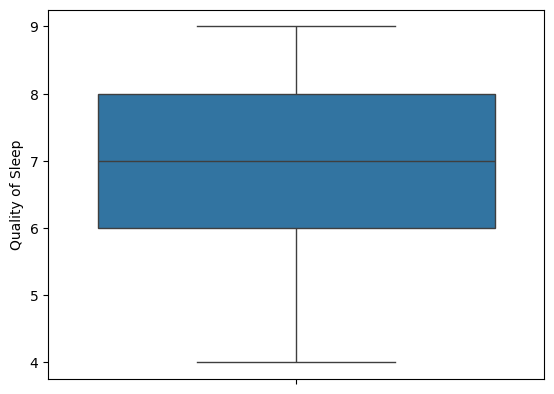

In [11]:
sns.boxplot(data=sleep, y="Quality of Sleep")
plt.show()

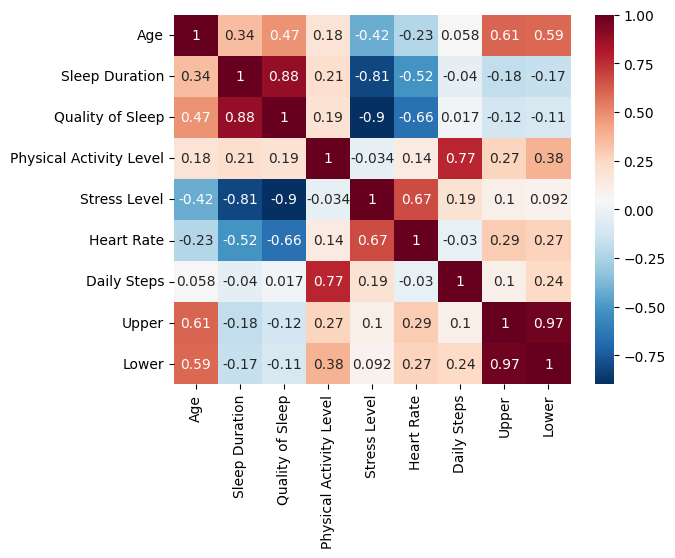

In [12]:
sns.heatmap(sleep[["Age", "Sleep Duration", "Quality of Sleep",
                   "Physical Activity Level", "Stress Level", "Heart Rate", 
                   "Daily Steps", "Upper", "Lower"]].corr(),
            cmap="RdBu_r",
            annot=True)
plt.savefig("heatmap.png")
plt.show()

__Brief Summary__
1. There is a robust positive correlation between sleep quality and duration. Individuals experiencing high sleep quality generally have longer sleep durations, while those with poor sleep quality tend to sleep for shorter durations.
2. Sleep quality and stress levels share a robust negative correlation. Individuals with lower stress levels generally experience better sleep quality, while those with higher stress levels often face poor sleep quality.

Note:
Correlation dosen't imply causation.

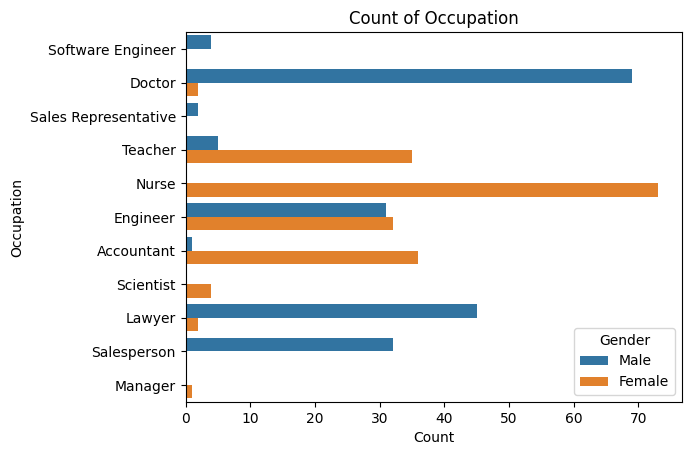

In [13]:
sns.countplot(data=sleep, y="Occupation", hue="Gender")
plt.xlabel("Count")
plt.title("Count of Occupation")
plt.show()

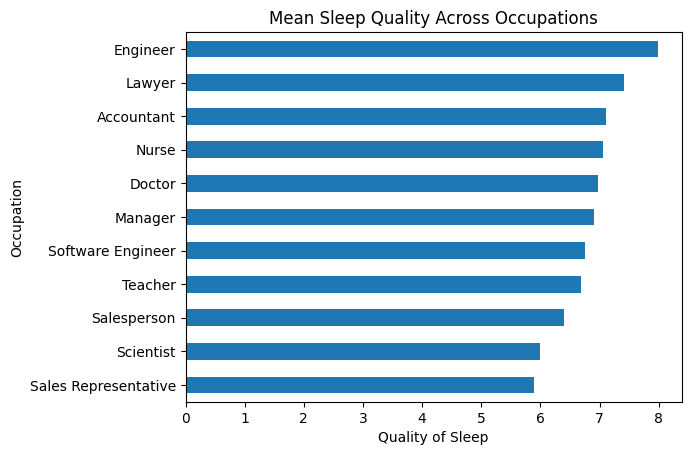

In [14]:
sleep.groupby("Occupation")["Sleep Duration"].mean().sort_values(ascending=True).plot(kind="barh")
plt.xlabel("Quality of Sleep")
plt.title("Mean Sleep Quality Across Occupations")
plt.show()

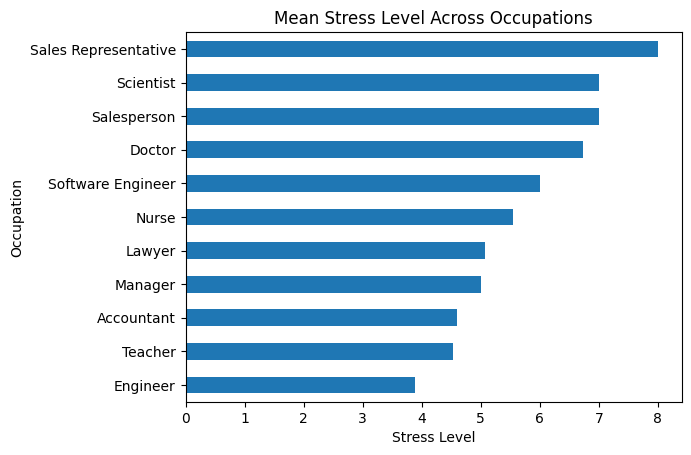

In [15]:
sleep.groupby("Occupation")["Stress Level"].mean().sort_values(ascending=True).plot(kind="barh")
plt.xlabel("Stress Level")
plt.title("Mean Stress Level Across Occupations")
plt.show()

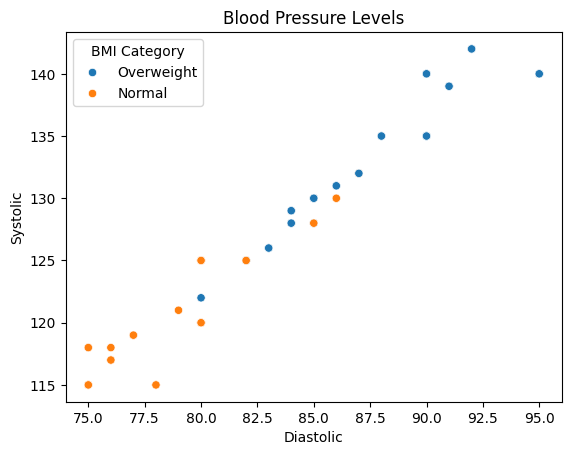

In [16]:
sns.scatterplot(data=sleep, x="Lower", y="Upper", hue="BMI Category")
plt.xlabel("Diastolic")
plt.ylabel("Systolic")
plt.title("Blood Pressure Levels")
plt.savefig("blood pressure.png")
plt.show()

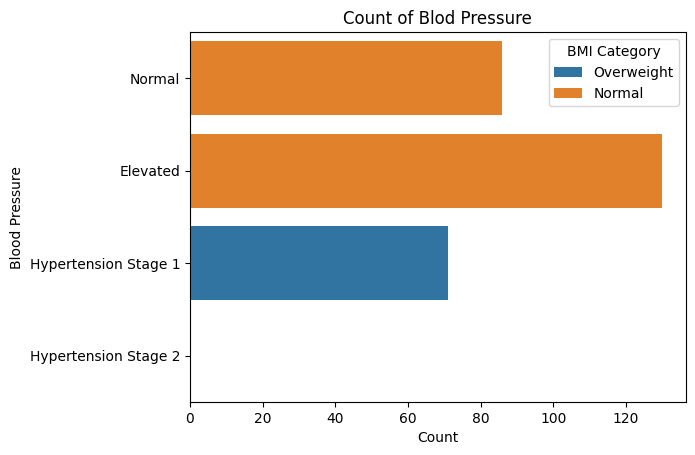

In [17]:
sns.countplot(data=sleep, y="Upper Category", hue="BMI Category")
plt.ylabel("Blood Pressure")
plt.xlabel("Count")
plt.title("Count of Blod Pressure")
plt.show()

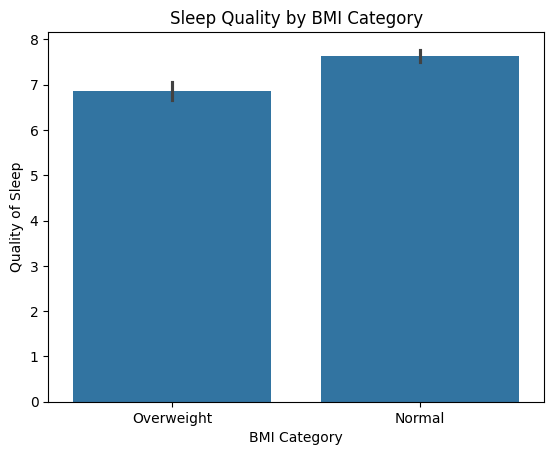

In [18]:
sns.barplot(data=sleep, x="BMI Category", y="Quality of Sleep")
plt.title("Sleep Quality by BMI Category")
plt.savefig("sleep quality bmi.png")
plt.show()

__Brief Summary__
1. A person with a normal weight tends to have blood pressure within the normal range, while an overweight individual is more likely to have elevated blood pressure, indicating hypertension.
2. In terms of sleep quality, individuals with a normal weight generally experience better sleep than those who are overweight.

Note:
Correlation dosen't imply causation.

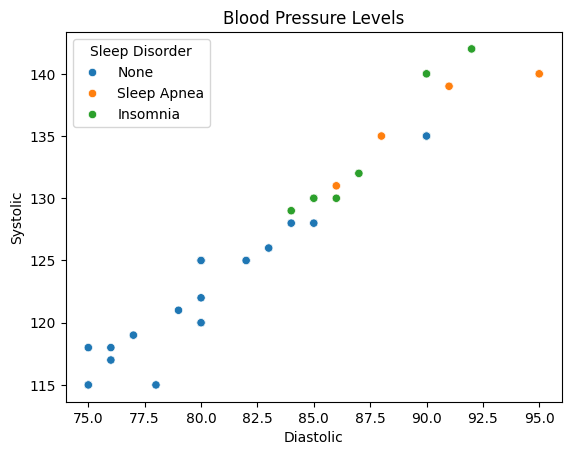

In [19]:
sns.scatterplot(data=sleep, x="Lower", y="Upper", hue="Sleep Disorder")
plt.xlabel("Diastolic")
plt.ylabel("Systolic")
plt.title("Blood Pressure Levels")
plt.show()

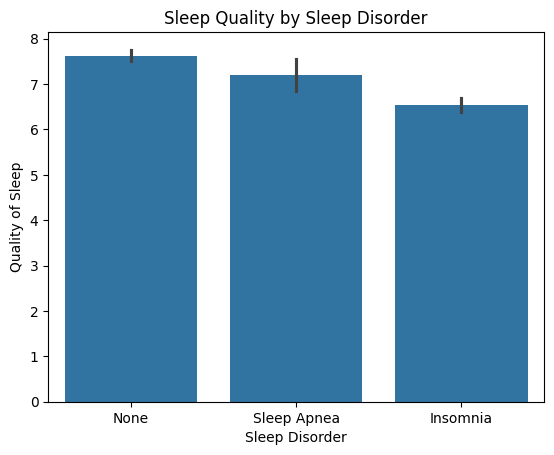

In [20]:
sns.barplot(data=sleep, x="Sleep Disorder",y="Quality of Sleep")
plt.title("Sleep Quality by Sleep Disorder")
plt.show()

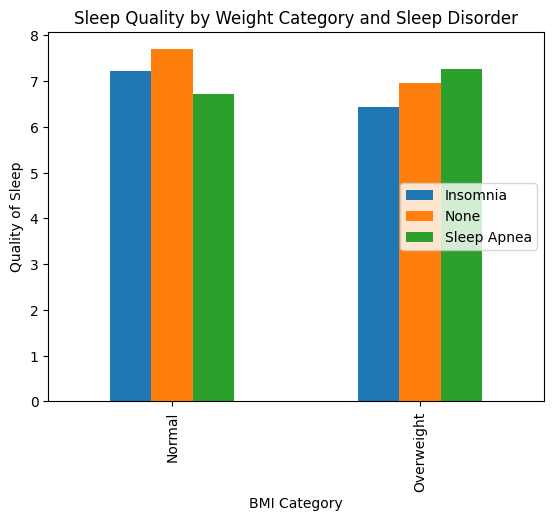

In [21]:
pd.pivot_table(data=sleep, index="BMI Category", columns="Sleep Disorder", values="Quality of Sleep") \
    .plot(kind="bar")
plt.ylabel("Quality of Sleep")
plt.title("Sleep Quality by Weight Category and Sleep Disorder")
plt.legend(loc="center right")
plt.show()

__Brief Summary__
1. Individuals without sleep disorders typically have blood pressure within the normal range compared to others.
2. Those without sleep disorders also enjoy a higher average sleep quality than their counterparts.
3. Individuals with a normal weight and no sleep disorders generally experience better sleep compared to others.

Note:
Correlation dosen't imply causation.

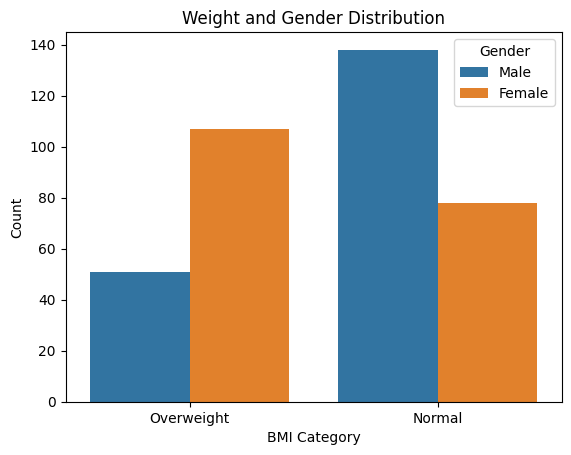

In [22]:
sns.countplot(data=sleep, x="BMI Category", hue="Gender")
plt.ylabel("Count")
plt.title("Weight and Gender Distribution")
plt.show()

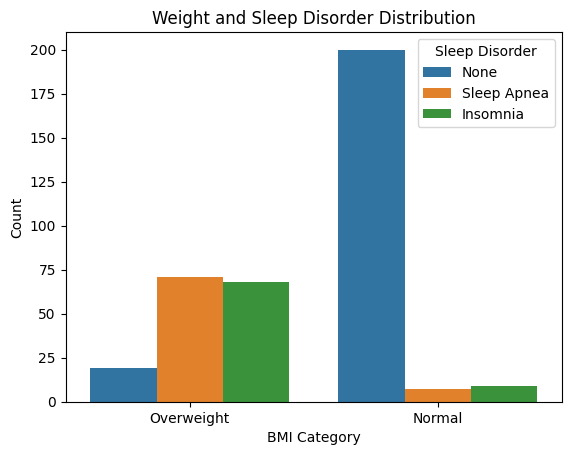

In [23]:
sns.countplot(data=sleep, x="BMI Category", hue="Sleep Disorder")
plt.ylabel("Count")
plt.title("Weight and Sleep Disorder Distribution")
plt.show()

__Brief Summary__

Individuals with normal weights are less likely to experience sleep disorders, while those with overweight tendencies are more prone to conditions such as sleep apnea and insomnia.

Note:
Correlation dosen't imply causation.

# Conclusion
Based on the visualizations and observed patterns, there is a strong correlation between sleep quality, sleep duration, and stress levels. Individuals with longer sleep durations generally experience better sleep quality, and also individuals with lower stress levels are inclined to experience better sleep quality. Moreover, individuals with a normal weight are more likely to enjoy better sleep quality and are less prone to experiencing sleep disorders. Occupations such as sales representative, scientist, and salesperson may require special attention in managing these factors. In conclusion, these hypotheses suggest a potential relationship, and I recommend testing them through hypothesis testing for further validation.

# Recommendation
To enhance the quality of sleep, it's essential to pay attention to and regulate both sleep duration and stress levels. Attaining an ideal weight is also important in minimizing the risk of sleep disorders and fostering better sleep quality.